## Dimensionality Reduction
### Principal Component Analysis
### Unsupervised Learning - LINEAR

### Data 
https://www.kaggle.com/code/vipulgohel/clustering-pca/data<br>

__Data contains:__ <br>

 - Name of the country,
 - Death of children under five years of age per 1000 live births,
 - Exports of goods and services; Exports of goods and services given as %age of the Total GDP;
 - Health_Spending
 - Imports of goods and services, Given as %age of the Total GDP;
 - Net income per person;
 - The measurement of the annual growth rate of the Total GDP;
 - The average number of years a newborn child would live if the current mortality patterns are to remain the same;
 - The number of children born to each woman if the current age-fertility rates remain the same.
 - GDP

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('Country-data.csv')
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [3]:
# Change Colum Title
df.columns=["Country", "Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
df.head(2)

,Country,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [4]:
X = df.loc[:,["Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]].values
y = df.loc[:,['Country']] # We DO NOT need these for CLUSTERING (but will come handy later on)

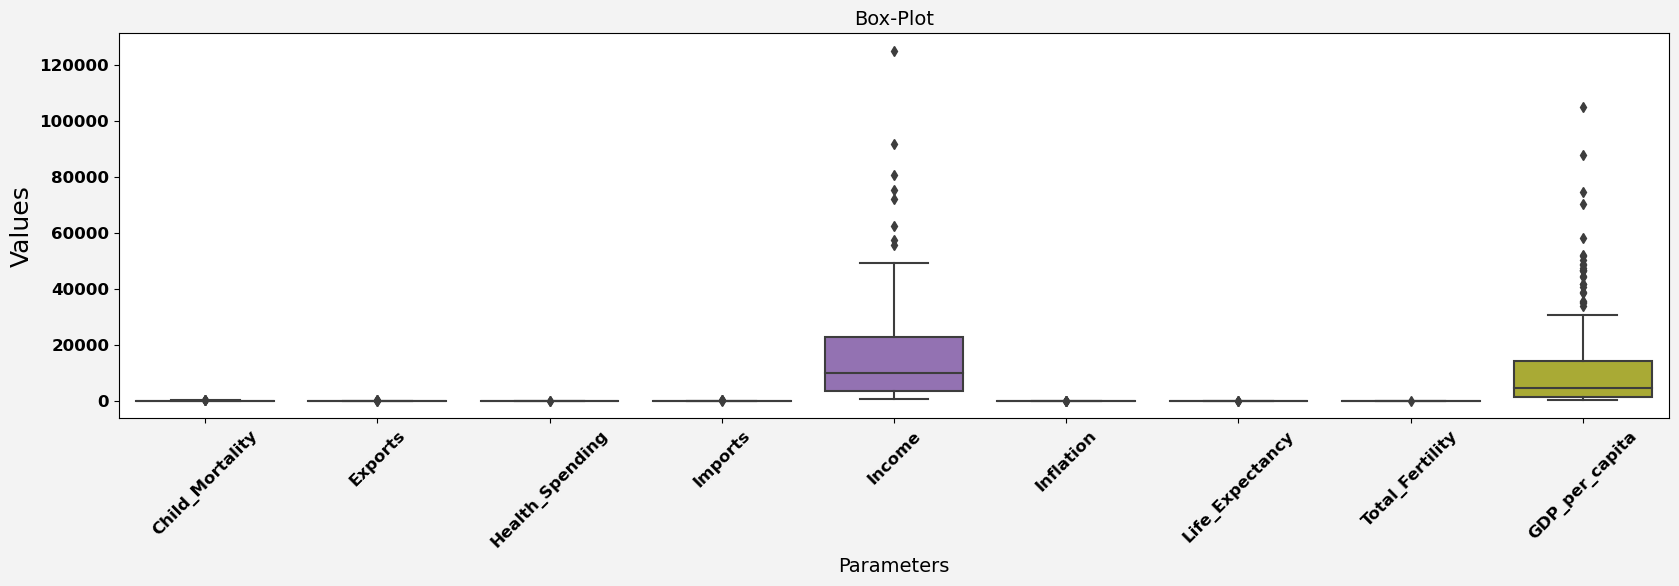

In [5]:
# Plot box-plot to check the data outliers - Determine what you wnat to do with Outliers
import seaborn as sns
fig= plt.figure(figsize=(20,5))
fig.set_facecolor("#F3F3F3")
a=sns.boxplot(data=df) # df --> dataframe - here Country Data
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Box-Plot', fontsize=14)
plt.ylabel('Values', fontsize=18);plt.xlabel('Parameters',fontsize=14)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

* To learn more about correlation coefficient & covariance
https://www.alchemer.com/resources/blog/variance-covariance-correlation/#:~:text=Covariance%20provides%20insight%20into%20how,move%20in%20the%20same%20direction.

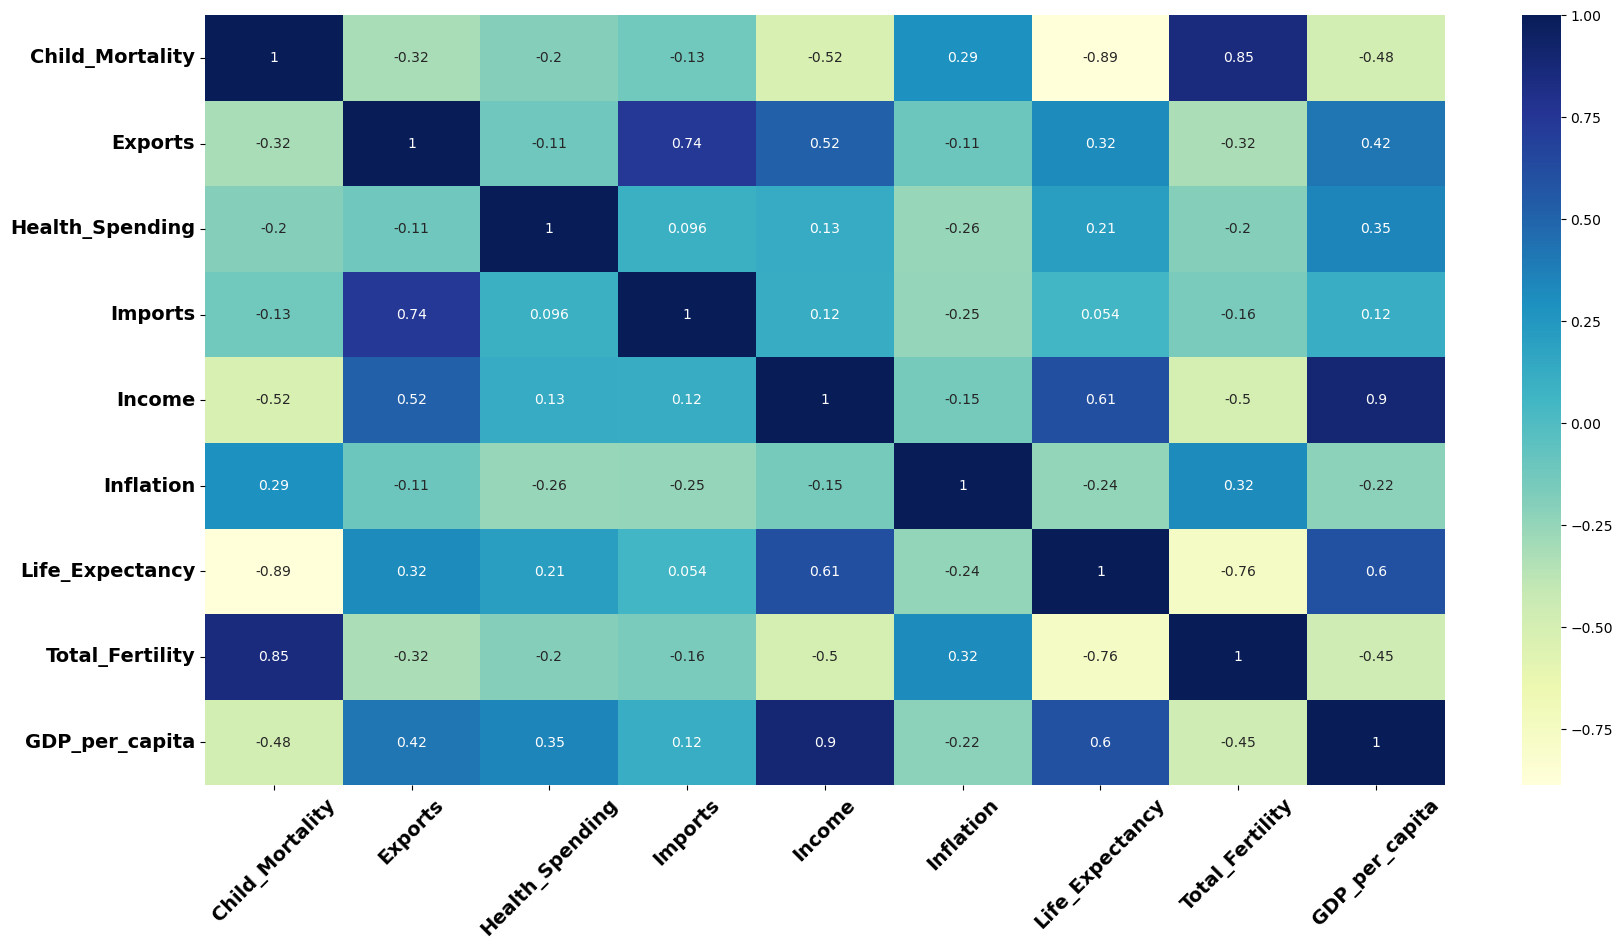

---------------------------------
Features having correlation 0.70 above:  3

['Imports', 'Total_Fertility', 'GDP_per_capita']


In [6]:
# Plot heatmap to check the multicollinearity of the variables
plt.figure(figsize = (20,10))  
fig.set_facecolor("#F3F3F3")
g = df.corr() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
b = sns.heatmap(g,cmap="YlGnBu",annot = True)
plt.setp(b.get_xticklabels(), rotation=45)
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.show()

print('---------------------------------')

# Upper value
Upper_Value = g.where(np.triu(np.ones(g.shape), k=1).astype(bool))

# Features having a Higher correlation of more than 0.5
High_Corr_features = [column for column in Upper_Value.columns if any(Upper_Value[column] > 0.70)]

print('\033[1m' +"Features having correlation 0.70 above: "+ '\033[0m', "{}\n\n{}".format(len(High_Corr_features), High_Corr_features))

### Feature Scaling Important

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Sc = sc.fit_transform(X)

In [8]:
Labels = df.columns[1:]

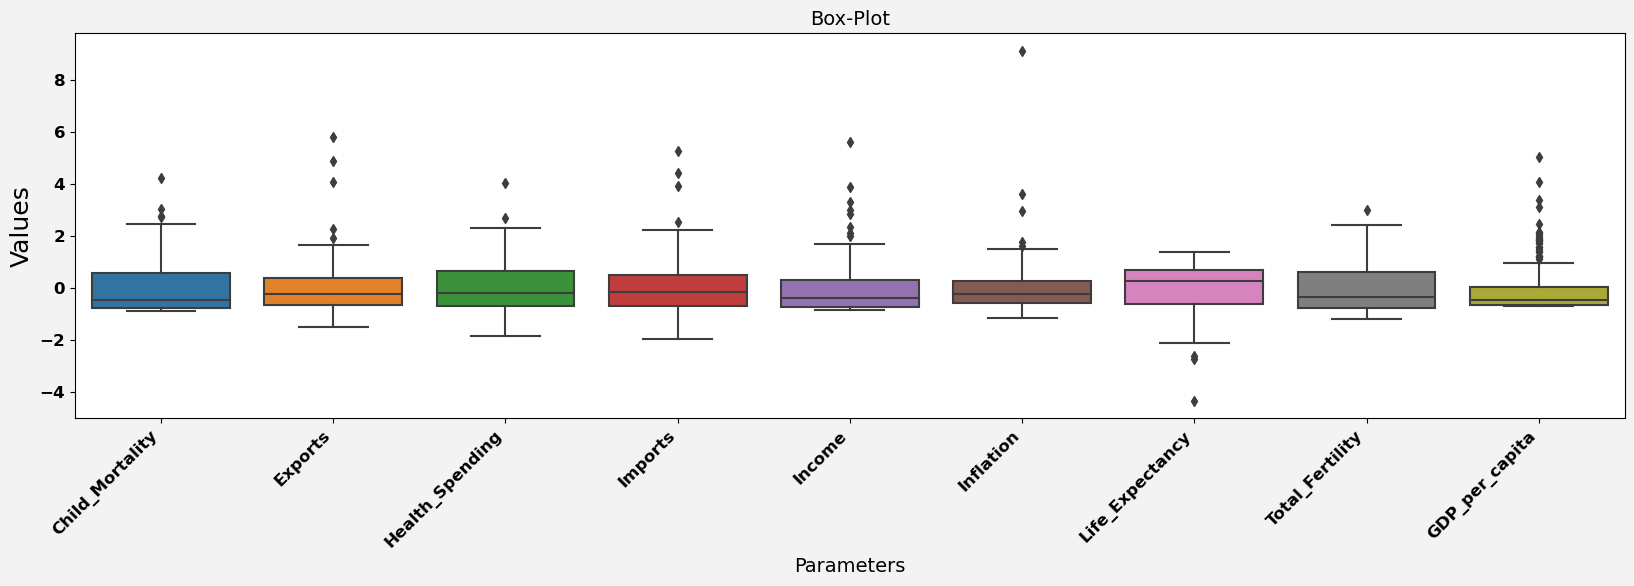

In [9]:
# Plot box-plot to check the data outliers - Determine what you wnat to do with Outliers
import seaborn as sns
fig= plt.figure(figsize=(20,5))
fig.set_facecolor("#F3F3F3")
a=sns.boxplot(data=X_Sc) # Scaled data
plt.title('Box-Plot', fontsize=14)
plt.ylabel('Values', fontsize=18);plt.xlabel('Parameters',fontsize=14)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
a.set_xticklabels(Labels, rotation=45, ha='right')
plt.show()

### Applying PCA all components to check variance

In [10]:
# Applying PCA to check variance
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_P = pca.fit_transform(X_Sc)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


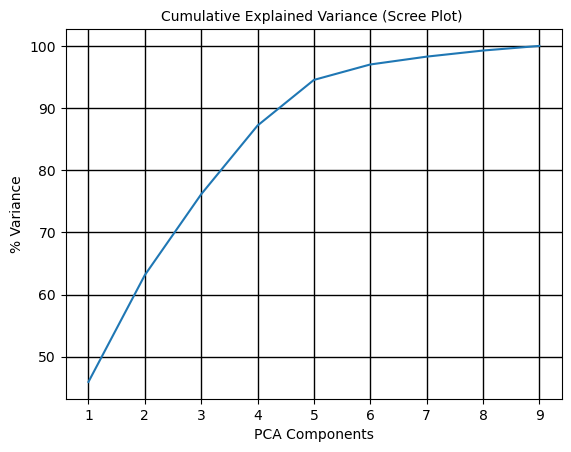

In [11]:
plt.plot(range(1,len(explained_variance)+1),np.cumsum(explained_variance*100))
plt.title('Cumulative Explained Variance (Scree Plot) ',fontsize=10)
plt.xlabel('PCA Components',fontsize=10)
plt.ylabel('% Variance',fontsize=10)
plt.grid(color='k', linestyle='-', linewidth=1)

We observe that five components describe ~ 95% of information; hence we will select the five components.

### Rerun Selecting number of components

In [12]:
# Applying PCA after selecting no of components
from sklearn.decomposition import PCA
pca_n = PCA(n_components = 5)  # 5 Components give us 95% explanation
X_PZ = pca_n.fit_transform(X_Sc)
X_PZ.shape # Reduced Data Set we will come back to

(167, 5)

In [13]:
# Remove the country column and keep only the data column for data frame evaluation
dfr = df.drop('Country',axis = 1)
colnames = list(dfr.columns)
PC_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca_n.components_[0],'PC2':pca_n.components_[1],'PC3':pca_n.components_[2],'PC4':pca_n.components_[3],'PC5':pca_n.components_[4]})
PC_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,Child_Mortality,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,Exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,Health_Spending,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,Imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,Income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,Inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,Life_Expectancy,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,Total_Fertility,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,GDP_per_capita,0.392645,-0.046022,0.122977,0.531995,-0.180167


In [14]:
PC_df.Feature

0    Child_Mortality
1            Exports
2    Health_Spending
3            Imports
4             Income
5          Inflation
6    Life_Expectancy
7    Total_Fertility
8     GDP_per_capita
Name: Feature, dtype: object

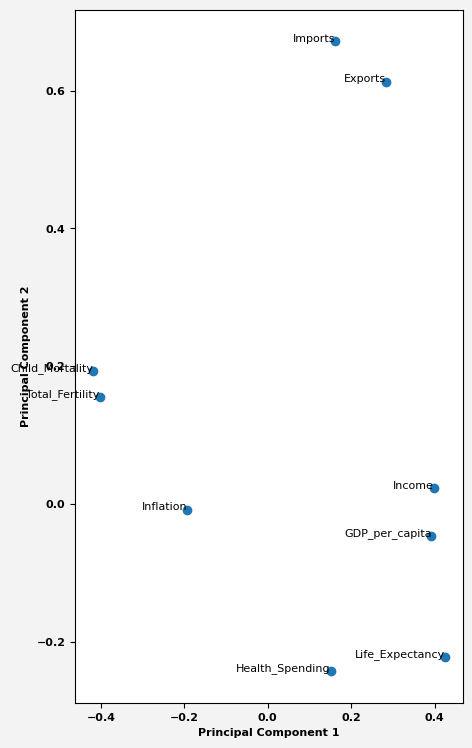

In [15]:
# Visulaize the first two principal components
fig = plt.figure(figsize = (5,9))
fig.set_facecolor("#F3F3F3")
plt.scatter(PC_df.PC1, PC_df.PC2)
plt.xlabel('Principal Component 1',fontsize=8, fontweight='bold')
plt.ylabel('Principal Component 2',fontsize=8, fontweight='bold')
for i, txt in enumerate(PC_df.Feature):
    plt.annotate(txt, (PC_df.PC1[i],PC_df.PC2[i]),fontsize=8,  horizontalalignment='right')
plt.yticks(fontsize=8, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold')
plt.show()

* The graph shows the principal component number one is observed to be in the direction where Life Expectancy, GDP per capita, Income, Health Spending are high. 
* Similarly, the principal component number two is observed to be where child mortality and Total fertility are higher.
* Imports and Exports are high for both components

In [16]:
X_PZ.shape # Reduced Data Set we will come back to

(167, 5)

In [17]:
# Take the transpose of the PC matrix so that we can create the new matrix
X_PZT = np.transpose(X_PZ) # [5*167] * [167*5] --> 5*5 Matrix 

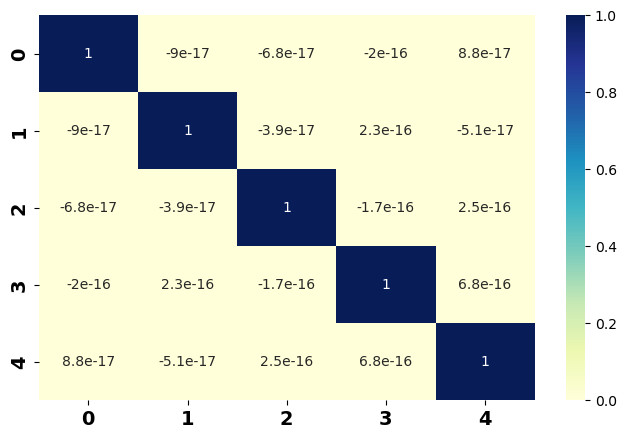

In [18]:
# Create correlation matrix for the principal components
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
corrmat = np.corrcoef(X_PZT)
plt.figure(figsize = (8,5))  
fig.set_facecolor("#F3F3F3")
sns.heatmap(corrmat,cmap="YlGnBu",annot = True)
plt.setp(b.get_xticklabels(), fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.show()

* None of the principal components are now correlated.

### 3D Scatter Plot of different K-Means Clusters after PCA

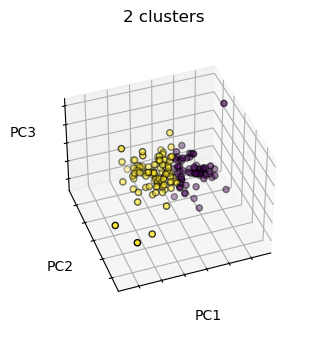

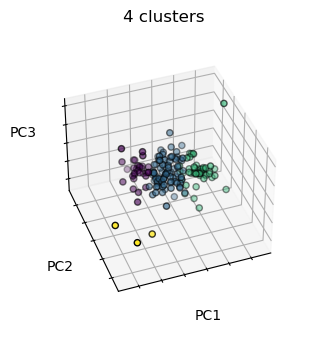

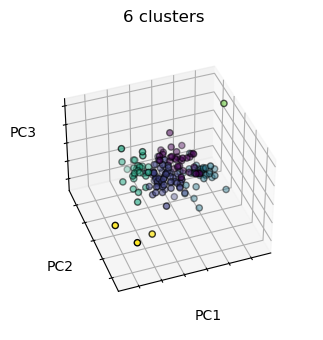

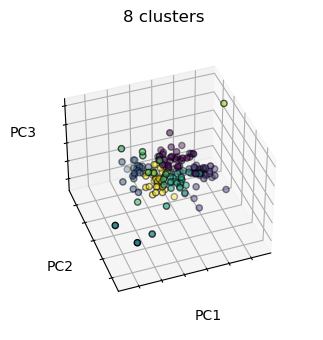

In [19]:
from sklearn.cluster import KMeans

# Though the following import is not directly being used, 
# it is required for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

estimators = [('k_means_2', KMeans(n_clusters=2)),
              ('k_means_3', KMeans(n_clusters=4)),
              ('k_means_5', KMeans(n_clusters=6)),
              ('k_means_7', KMeans(n_clusters=8))]
fignum = 1
titles = ['2 clusters','4 clusters', '6 clusters', '8 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=40, azim=70)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X_PZ)
    labels = est.labels_

    ax.scatter(X_PZ[:, 0], X_PZ[:, 1], X_PZ[:, 2],
               c=labels.astype(np.float64), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [20]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

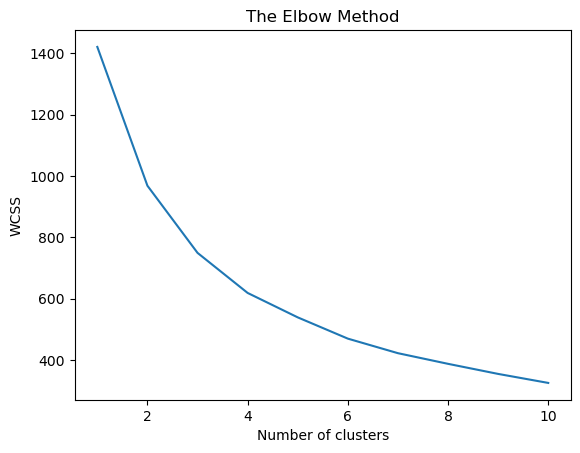

In [21]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_PZ)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Looks like 4 clusters looks good in the PCA space

In [22]:
est = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
est.fit(X_PZ)
labels = est.labels_

In [23]:
print(labels)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 1 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [25]:
y[labels==0]

,Country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
...,...
160,Uruguay
161,Uzbekistan
162,Vanuatu
163,Venezuela


In [26]:
y[labels==1]

,Country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [27]:
y[labels==2]

,Country
7,Australia
8,Austria
15,Belgium
23,Brunei
29,Canada
42,Cyprus
44,Denmark
53,Finland
54,France
58,Germany


In [28]:
y[labels==3]

,Country
91,Luxembourg
98,Malta
133,Singapore


### Can you use domain knowledge to deciper these groups of countries?